Coefficients (Scikit-Learn): 
 [938.23786125]
Coefficients (Your Method): 
 152.91886182616167 938.2378612512633
    Actual  Predicted (Scikit-Learn)
0    233.0                225.973240
1     91.0                115.747634
2    111.0                163.276106
3    152.0                114.736390
4    120.0                120.803854
5     67.0                158.219886
6    310.0                236.085681
7     94.0                121.815098
8    183.0                 99.567728
9     66.0                123.837587
10   173.0                204.737114
11    72.0                 96.533996
12    49.0                154.174909
13    64.0                130.916295
14    48.0                 83.387823
15   178.0                171.366059
16   104.0                137.995004
17   132.0                137.995004
18   220.0                189.568453
19    57.0                 84.399067


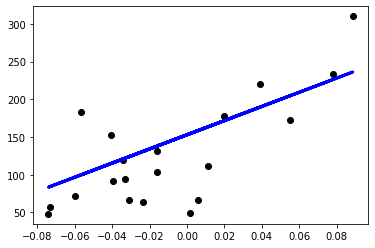

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Мой метод
def least_squares(x_data, y_data):
    # Вычисление коэффициентов
    n = len(x_data)
    sum_x = sum(x_data)
    sum_y = sum(y_data)
    sum_xy = sum(x * y for x, y in zip(x_data, y_data))
    sum_x2 = sum(x * x for x in x_data)

    b = (sum_xy - sum_x * sum_y / n) / (sum_x2 - sum_x ** 2 / n)
    a = (sum_y / n) - b * (sum_x / n)

    return a, b

# 1. Загрузка набора данных diabetes
diabetes = datasets.load_diabetes()

# 2. Исследование данных и выбор подходящего столбца для линейной регрессии
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Разделение данных на обучающие/тестовые наборы
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# 3. Реализация метода линейной регрессии с использованием Scikit-Learn
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

# Выводим коэффициенты
print('Coefficients (Scikit-Learn): \n', regr.coef_)

# Реализация собственного метода линейной регрессии
a, b = least_squares(diabetes_X_train.flatten(), diabetes_y_train)
print('Coefficients (Your Method): \n', a, b)

# 4. Вывод таблицы с результатами предсказаний
df = pd.DataFrame({'Actual': diabetes_y_test, 'Predicted (Scikit-Learn)': diabetes_y_pred})
print(df)

# Отрисовка данных и регрессионной прямой
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()
